In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns

In [2]:
data = pd.read_csv('user_behavior_dataset.csv')
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


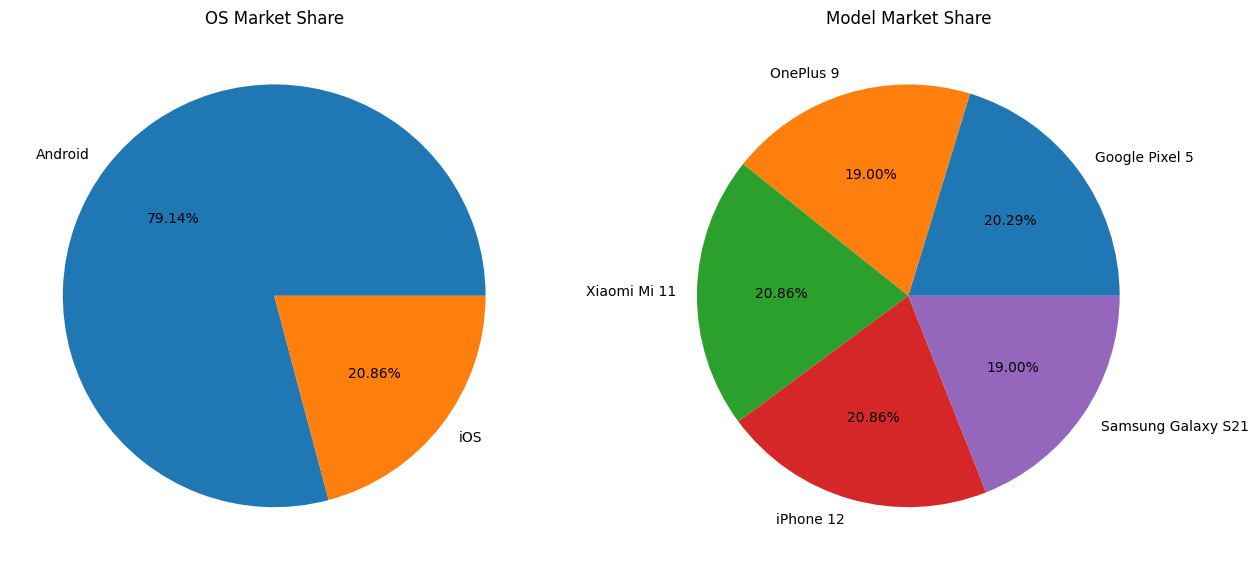

In [47]:
android_data = data[data['Operating System']=='Android']
ios_data = data[data['Operating System']=='iOS']

models = data['Device Model'].unique()
shares = []
for model in models:
    shares.append(data[data['Device Model']==model])

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.title('OS Market Share')
plt.pie([len(android_data)/len(data), len(ios_data)/len(data)], labels=['Android', 'iOS'], autopct='%1.2f%%')

plt.subplot(1,2,2)
plt.title('Model Market Share')
plt.pie([len(shares[0])/len(data), len(shares[1])/len(data), len(shares[2])/len(data), len(shares[3])/len(data), len(shares[4])/len(data)], labels=models, autopct='%1.2f%%')

plt.show()

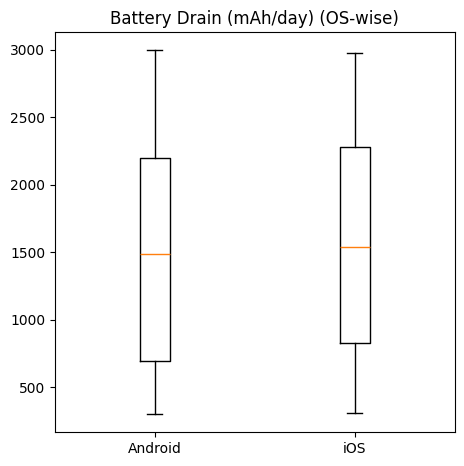

In [57]:
fig = plt.figure(figsize =(4, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Battery Drain (mAh/day) (OS-wise)')
ax.boxplot([android_data['Battery Drain (mAh/day)'],ios_data['Battery Drain (mAh/day)']])
plt.xticks([1,2],['Android', 'iOS'])
plt.show()

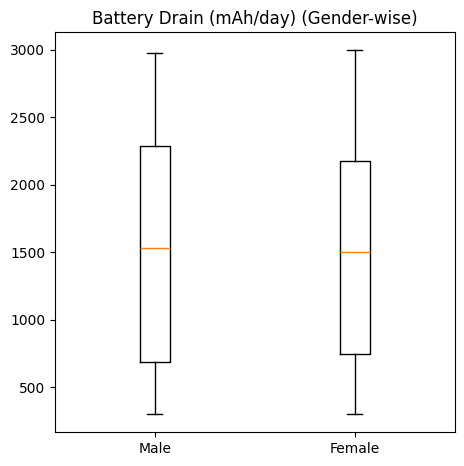

In [58]:
male_data = data[data['Gender']=='Male']
female_data = data[data['Gender']=='Female']

fig = plt.figure(figsize =(4, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Battery Drain (mAh/day) (Gender-wise)')
ax.boxplot([male_data['Battery Drain (mAh/day)'],female_data['Battery Drain (mAh/day)']])
plt.xticks([1,2],['Male', 'Female'])
plt.show()

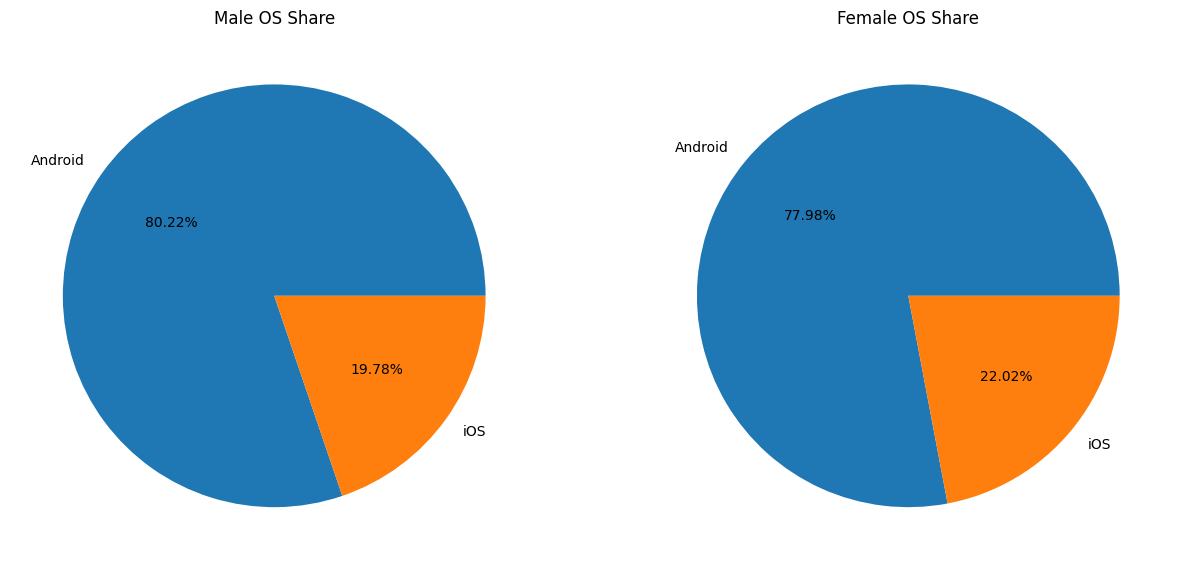

In [61]:
male_android_data = male_data[male_data['Operating System']=='Android']
male_ios_data = male_data[male_data['Operating System']=='iOS']
female_android_data = female_data[female_data['Operating System']=='Android']
female_ios_data = female_data[female_data['Operating System']=='iOS']

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.title('Male OS Share')
plt.pie([len(male_android_data)/len(data), len(male_ios_data)/len(data)], labels=['Android', 'iOS'], autopct='%1.2f%%')

plt.subplot(1,2,2)
plt.title('Female OS Share')
plt.pie([len(female_android_data)/len(data), len(female_ios_data)/len(data)], labels=['Android', 'iOS'], autopct='%1.2f%%')

plt.show()

In [55]:
encoder = OrdinalEncoder()
encoded_data = data.drop(columns=['User ID'])
encoded_data[['Device Model', 'Operating System', 'Gender']] = encoder.fit_transform(encoded_data[['Device Model', 'Operating System', 'Gender']])
encoded_data.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0.0,0.0,393,6.4,1872,67,1122,40,1.0,4
1,1.0,0.0,268,4.7,1331,42,944,47,0.0,3
2,3.0,0.0,154,4.0,761,32,322,42,1.0,2
3,0.0,0.0,239,4.8,1676,56,871,20,1.0,3
4,4.0,1.0,187,4.3,1367,58,988,31,0.0,3


<Axes: >

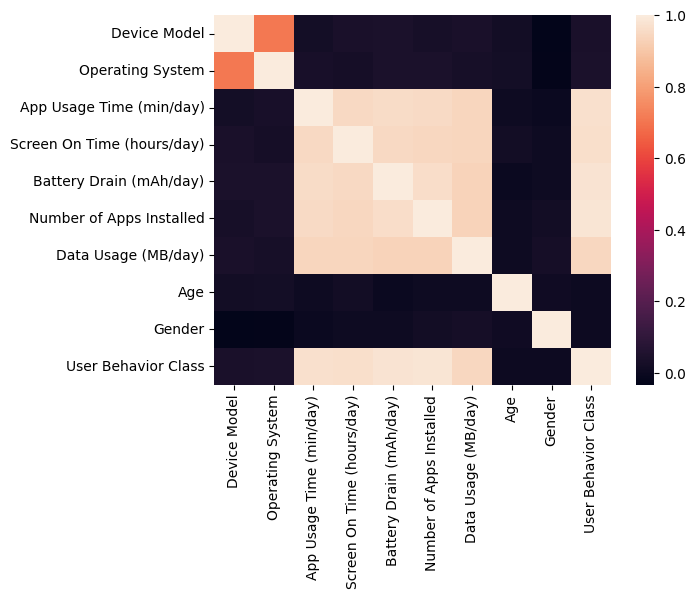

In [65]:
sns.heatmap(encoded_data.corr())